In [1]:
import numpy as np
import pandas as pd  
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.utils.testing import ignore_warnings
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

C:\Users\srava\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# Load data
train = pd.read_csv("trainAfterCleaningPreprocessing.csv", header=0, delimiter=",")

test = pd.read_csv("testAfterCleaningPreprocessing.csv", header=0, delimiter=",")

In [3]:
train = train.drop(columns=['Reviews','reviewNumbers','ratings'],axis=1)
train.rename(columns = {'Reviews after Cleaning':'review','Category':'sentiment'}, inplace = True)

In [4]:
train["sentiment"].replace({"positive": 1, "negative": 0}, inplace=True)

In [5]:
test = test.drop(columns=['Reviews','reviewNumbers','ratings'],axis=1)

In [6]:
test.rename(columns = {'Reviews after Cleaning':'review','Category':'sentiment'}, inplace = True)

In [7]:
test["sentiment"].replace({"positive": 1, "negative": 0}, inplace=True)

In [8]:
# bag of words  
bw_vectorizer = CountVectorizer(analyzer = "word", binary=True, ngram_range=(1, 2)) 
bw_vectorizer.fit(train.review)
train_bw = bw_vectorizer.transform(train.review)
test_bw  = bw_vectorizer.transform(test.review)

In [9]:
# Split data to test preprocessing and modeling techniques
X_train, X_test, y_train, y_test = train_test_split(train_bw, train.sentiment, test_size=0.3)

In [10]:
# Take a look at the vocabulary
wordslookingfor = bw_vectorizer.get_feature_names()
wordslookingfor

['00',
 '00 10',
 '00 doc',
 '00 keoni',
 '00 seen',
 '00 worth',
 '000',
 '000 produce',
 '0000000000001',
 '0000000000001 10',
 '000001',
 '000001 10',
 '000001 chance',
 '0001',
 '0001 percent',
 '00015',
 '00015 second',
 '001',
 '001 360',
 '001 brief',
 '001 laughometer',
 '002',
 '002 10',
 '003830',
 '003830 42',
 '006',
 '006 ending',
 '007',
 '007 adventure',
 '007 agent',
 '007 bruce',
 '007 cast',
 '007 dr',
 '007 fan',
 '007 franchise',
 '007 frwl',
 '007 game',
 '007 graphic',
 '007 least',
 '007 movie',
 '007 oh',
 '007 scene',
 '007 sure',
 '0079',
 '0079 one',
 '0080',
 '0080 0083',
 '0080 focus',
 '0080 war',
 '0080 well',
 '0083',
 '0083 08th',
 '0083 check',
 '00s',
 '00s 1991',
 '00s either',
 '00s far',
 '00s however',
 '00s seem',
 '00s several',
 '00s slasher',
 '00s still',
 '01',
 '01 10',
 '01 23',
 '01 30',
 '01 budget',
 '01 enterprise',
 '01 fat',
 '01 film',
 '01 give',
 '01 incident',
 '01 julie',
 '01 kid',
 '01 leaf',
 '01 may',
 '01 nyc',
 '01 product

In [11]:
#Random Forest using Bag of words
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X_train, y_train)
preds = rfc.predict(X_test)
score = accuracy_score(y_test,preds)*100
print(score)

84.64


In [12]:
#Navie Bayes using Bag of words
nbc = MultinomialNB()
nbc.fit(X_train, y_train)
preds = nbc.predict(X_test)
score = accuracy_score(y_test,preds)*100
print(score)

87.86666666666667


In [13]:
#Logistic Regression using Bag of words
LRModel = LogisticRegression(max_iter=1000)
LRModel.fit(X_train, y_train)
preds = LRModel.predict(X_test)
score = accuracy_score(y_test,preds)*100
print(score)

88.57333333333334


In [14]:
#SVC using Bag of words
@ignore_warnings(category=ConvergenceWarning)
def svc():
    #SVC Model using Bag of words
    for i in [0.01, 0.25, 0.5, 1]:
        svc = LinearSVC(C=i)
        svc.fit(X_train, y_train)
        preds = svc.predict(X_test)
        print ("Accuracy for C=",i,"is",accuracy_score(y_test, preds)*100)
svc()

Accuracy for C= 0.01 is 88.52
Accuracy for C= 0.25 is 88.22666666666666
Accuracy for C= 0.5 is 88.2
Accuracy for C= 1 is 88.14666666666666


LR Mean Accuracy: 88.38476% +/-(0.00551)
LinearSVC Mean Accuracy: 88.34476% +/-(0.00592)


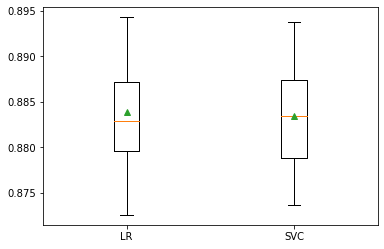

In [15]:
# evaluate model
LR = LogisticRegression(max_iter=1000)
cv1 = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
scores1 = cross_val_score(LR, X_train, y_train, scoring = 'accuracy', cv = cv1, n_jobs = -1)
print('LR Mean Accuracy: %.5f%% +/-(%.5f)' % ((scores1*100).mean(), (scores1).std()))
# evaluate model
SVC = LinearSVC(C=0.01)
cv2 = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
scores3 = cross_val_score(SVC, X_train, y_train, scoring = 'accuracy', cv = cv2, n_jobs = -1)
print('LinearSVC Mean Accuracy: %.5f%% +/-(%.5f)' % ((scores3*100).mean(), (scores3).std()))
# plot the results
plt.boxplot([scores1, scores3], labels=['LR', 'SVC'], showmeans=True)
plt.show()

In [16]:
from mlxtend.evaluate import paired_ttest_5x2cv
# check if difference between algorithms is real
t, p = paired_ttest_5x2cv(estimator1=LR, 
                          estimator2=SVC, 
                          X=X_train, 
                          y=y_train, 
                          scoring='accuracy',
                          random_seed=1)
# summarize
print(f'The P-value is = {p:.3f}')
print(f'The t-statistics is = {t:.3f}')
# interpret the result
if p <= 0.05:
    print('Since p<0.05, We can reject the null-hypothesis that both models perform equally well on this dataset. We may conclude that the two algorithms are significantly different.')
else:
    print('Since p>0.05, we cannot reject the null hypothesis and may conclude that the performance of the two algorithms is not significantly different.')

The P-value is = 0.470
The t-statistics is = -0.782
Since p>0.05, we cannot reject the null hypothesis and may conclude that the performance of the two algorithms is not significantly different.


In [17]:
#From the above 3 models, we got good accuracy for SVC model. So, applying the total data on SVC Model and predecting the sentiment
svcModel = LinearSVC(C=0.01)
svcModel.fit(train_bw, train.sentiment)
print ("Final Accuracy:",accuracy_score(test.sentiment, svcModel.predict(test_bw))*100)

Final Accuracy: 88.712


In [18]:
#Classification report for count vectorized features
lsvc_cv_report=classification_report(test.sentiment,svcModel.predict(test_bw),target_names=['Positive','Negative'])
print("Classification Report:\n")
print(lsvc_cv_report)

#confusion matrix for count vectorized features
lsvc_cv_cm=confusion_matrix(test.sentiment,svcModel.predict(test_bw),labels=[1,0])
print("Confusion Matrix:\n")
print(lsvc_cv_cm)

Classification Report:

              precision    recall  f1-score   support

    Positive       0.89      0.88      0.89     12500
    Negative       0.88      0.89      0.89     12500

    accuracy                           0.89     25000
   macro avg       0.89      0.89      0.89     25000
weighted avg       0.89      0.89      0.89     25000

Confusion Matrix:

[[11167  1333]
 [ 1489 11011]]


AUC: 0.88712


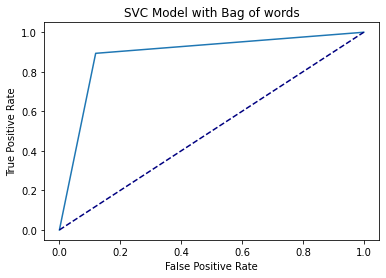

In [19]:
fpr, tpr, _ = roc_curve(test.sentiment, svcModel.predict(test_bw))
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)
plt.plot(fpr, tpr)
plt.title("SVC Model with Bag of words")
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [20]:
lrModel = LogisticRegression(max_iter=1000)
lrModel.fit(train_bw, train.sentiment)
print ("Final Accuracy:",accuracy_score(test.sentiment, lrModel.predict(test_bw))*100)

Final Accuracy: 88.716


In [21]:
#Classification report for count vectorized features
lr_cv_report=classification_report(test.sentiment,svcModel.predict(test_bw),target_names=['Positive','Negative'])
print("Classification Report:\n")
print(lr_cv_report)

#confusion matrix for count vectorized features
lr_cv_cm=confusion_matrix(test.sentiment,svcModel.predict(test_bw),labels=[1,0])
print("Confusion Matrix:\n")
print(lr_cv_cm)

Classification Report:

              precision    recall  f1-score   support

    Positive       0.89      0.88      0.89     12500
    Negative       0.88      0.89      0.89     12500

    accuracy                           0.89     25000
   macro avg       0.89      0.89      0.89     25000
weighted avg       0.89      0.89      0.89     25000

Confusion Matrix:

[[11167  1333]
 [ 1489 11011]]


AUC: 0.88712


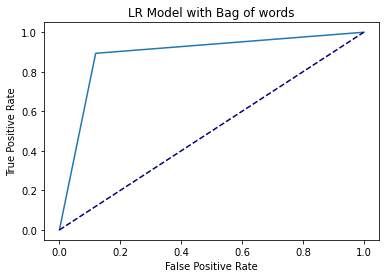

In [22]:
fpr, tpr, _ = roc_curve(test.sentiment, svcModel.predict(test_bw))
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)
plt.plot(fpr, tpr)
plt.title("LR Model with Bag of words")
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [23]:
#Using TFIDF Vectorizer
tdidfVect = TfidfVectorizer()
tdidfVect.fit(train.review)
tdfTrain = tdidfVect.transform(train.review)
tdfTest = tdidfVect.transform(test.review)

In [24]:
# Split data to test preprocessing and modeling techniques
X_train, X_test, y_train, y_test = train_test_split(tdfTrain, train.sentiment, test_size=0.3)

In [25]:
#Predecting the sentiment using Random Forest Model
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X_train, y_train)
preds = rfc.predict(X_test)
score = accuracy_score(y_test,preds)*100
print(score)

84.72


In [26]:
#Predecting the sentiment using Navie Bayes Model
nbc = MultinomialNB()
nbc.fit(X_train, y_train)
preds = nbc.predict(X_test)
score = accuracy_score(y_test,preds)*100
print(score)

86.13333333333333


In [27]:
LRModel = LogisticRegression(max_iter=1000)
LRModel.fit(X_train, y_train)
preds = LRModel.predict(X_test)
score = accuracy_score(y_test,preds)*100
print(score)

88.78666666666668


In [28]:
#Predecting the sentiment using SVC Model
for i in [0.01, 0.25, 0.5, 1]:
    svc = LinearSVC(C=i)
    svc.fit(X_train, y_train)
    print ("Accuracy for C=",i,"is",accuracy_score(y_test,svc.predict(X_test)))

Accuracy for C= 0.01 is 0.8566666666666667
Accuracy for C= 0.25 is 0.8944
Accuracy for C= 0.5 is 0.8921333333333333
Accuracy for C= 1 is 0.8910666666666667


LR Mean Accuracy: 88.25333% +/-(0.00630)
LinearSVC Mean Accuracy: 88.87810% +/-(0.00602)


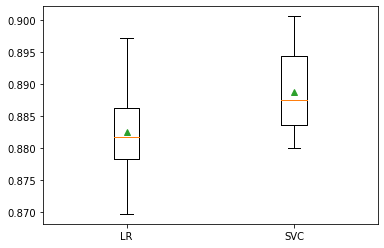

In [29]:
# evaluate model
LR = LogisticRegression(max_iter=1000)
cv1 = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
scores1 = cross_val_score(LR, X_train, y_train, scoring = 'accuracy', cv = cv1, n_jobs = -1)
print('LR Mean Accuracy: %.5f%% +/-(%.5f)' % ((scores1*100).mean(), (scores1).std()))
# evaluate model
SVC = LinearSVC(C=0.25)
cv2 = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
scores3 = cross_val_score(SVC, X_train, y_train, scoring = 'accuracy', cv = cv2, n_jobs = -1)
print('LinearSVC Mean Accuracy: %.5f%% +/-(%.5f)' % ((scores3*100).mean(), (scores3).std()))
# plot the results
plt.boxplot([scores1, scores3], labels=['LR', 'SVC'], showmeans=True)
plt.show()

In [30]:
from mlxtend.evaluate import paired_ttest_5x2cv
# check if difference between algorithms is real
t, p = paired_ttest_5x2cv(estimator1=LR, 
                          estimator2=SVC, 
                          X=X_train, 
                          y=y_train, 
                          scoring='accuracy',
                          random_seed=1)
# summarize
print(f'The P-value is = {p:.3f}')
print(f'The t-statistics is = {t:.3f}')
# interpret the result
if p <= 0.05:
    print('Since p<0.05, We can reject the null-hypothesis that both models perform equally well on this dataset. We may conclude that the two algorithms are significantly different.')
else:
    print('Since p>0.05, we cannot reject the null hypothesis and may conclude that the performance of the two algorithms is not significantly different.')

The P-value is = 0.001
The t-statistics is = -7.078
Since p<0.05, We can reject the null-hypothesis that both models perform equally well on this dataset. We may conclude that the two algorithms are significantly different.


In [31]:
#From the above 3 models, we got good accuracy for SVC model. So, applying the total data on SVC Model and predecting the sentiment
svcModel = LinearSVC(C=0.25)
svcModel.fit(tdfTrain, train.sentiment)
print ("Final Accuracy:",accuracy_score(test.sentiment, svcModel.predict(tdfTest))*100)

Final Accuracy: 88.008


In [32]:
#Classification report for count vectorized features
svc_cv_report=classification_report(test.sentiment,svcModel.predict(tdfTest),target_names=['Positive','Negative'])
print("Classification Report:\n")
print(svc_cv_report)

#confusion matrix for count vectorized features
svc_cv_cm=confusion_matrix(test.sentiment,svcModel.predict(tdfTest),labels=[1,0])
print("Confusion Matrix:\n")
print(svc_cv_cm)

Classification Report:

              precision    recall  f1-score   support

    Positive       0.88      0.89      0.88     12500
    Negative       0.88      0.88      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000

Confusion Matrix:

[[10939  1561]
 [ 1437 11063]]


AUC: 0.8800800000000001


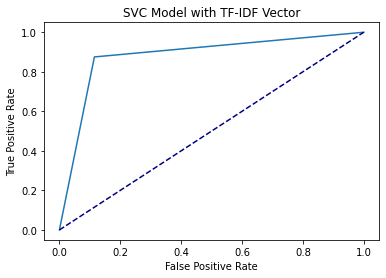

In [33]:
fpr, tpr, _ = roc_curve(test.sentiment, svcModel.predict(tdfTest))
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)
plt.plot(fpr, tpr)
plt.title("SVC Model with TF-IDF Vector")
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [34]:
#Using TF Vectorizer
tfVect = TfidfVectorizer(use_idf=False)
tfVect.fit(train.review)
tfTrain = tfVect.transform(train.review)
tfTest = tfVect.transform(test.review)

In [35]:
# Split data to test preprocessing and modeling techniques
X_train, X_test, y_train, y_test = train_test_split(tfTrain, train.sentiment, test_size=0.3)

In [36]:
#Predecting the sentiment using Random Forest Model
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X_train, y_train)
preds = rfc.predict(X_test)
score = accuracy_score(y_test,preds)*100
print(score)

84.42666666666668


In [37]:
#Predecting the sentiment using Navie Bayes Model
nbc = MultinomialNB()
nbc.fit(X_train, y_train)
preds = nbc.predict(X_test)
score = accuracy_score(y_test,preds)*100
print(score)

86.24000000000001


In [38]:
LRModel = LogisticRegression(max_iter=1000)
LRModel.fit(X_train, y_train)
preds = LRModel.predict(X_test)
score = accuracy_score(y_test,preds)*100
print(score)

86.85333333333334


In [39]:
#Predecting the sentiment using SVC Model
for i in [0.01, 0.25, 0.5, 1]:
    svc = LinearSVC(C=i)
    svc.fit(X_train, y_train)
    print ("Accuracy for C=",i,"is",accuracy_score(y_test,svc.predict(X_test)))

Accuracy for C= 0.01 is 0.8278666666666666
Accuracy for C= 0.25 is 0.8782666666666666
Accuracy for C= 0.5 is 0.8808
Accuracy for C= 1 is 0.8789333333333333


LR Mean Accuracy: 87.13524% +/-(0.00874)
LinearSVC Mean Accuracy: 88.22476% +/-(0.00870)


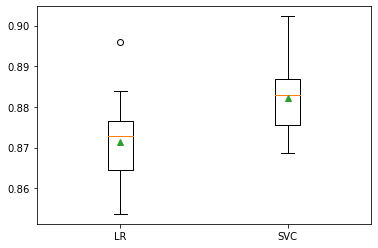

In [40]:
# evaluate model
LR = LogisticRegression(max_iter=1000)
cv1 = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
scores1 = cross_val_score(LR, X_train, y_train, scoring = 'accuracy', cv = cv1, n_jobs = -1)
print('LR Mean Accuracy: %.5f%% +/-(%.5f)' % ((scores1*100).mean(), (scores1).std()))
# evaluate model
SVC = LinearSVC(C=0.5)
cv2 = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
scores3 = cross_val_score(SVC, X_train, y_train, scoring = 'accuracy', cv = cv2, n_jobs = -1)
print('LinearSVC Mean Accuracy: %.5f%% +/-(%.5f)' % ((scores3*100).mean(), (scores3).std()))
# plot the results
plt.boxplot([scores1, scores3], labels=['LR', 'SVC'], showmeans=True)
plt.show()

In [41]:
from mlxtend.evaluate import paired_ttest_5x2cv
# check if difference between algorithms is real
t, p = paired_ttest_5x2cv(estimator1=LR, 
                          estimator2=SVC, 
                          X=X_train, 
                          y=y_train, 
                          scoring='accuracy',
                          random_seed=1)
# summarize
print(f'The P-value is = {p:.3f}')
print(f'The t-statistics is = {t:.3f}')
# interpret the result
if p <= 0.05:
    print('Since p<0.05, We can reject the null-hypothesis that both models perform equally well on this dataset. We may conclude that the two algorithms are significantly different.')
else:
    print('Since p>0.05, we cannot reject the null hypothesis and may conclude that the performance of the two algorithms is not significantly different.')

The P-value is = 0.004
The t-statistics is = -5.158
Since p<0.05, We can reject the null-hypothesis that both models perform equally well on this dataset. We may conclude that the two algorithms are significantly different.


In [42]:
svcModel = LinearSVC(C=0.5)
svcModel.fit(tfTrain, train.sentiment)
print ("Final Accuracy:",accuracy_score(test.sentiment, svcModel.predict(tfTest))*100)

Final Accuracy: 87.964


In [43]:
#Classification report for count vectorized features
svc_cv_report=classification_report(test.sentiment,svcModel.predict(tfTest),target_names=['Positive','Negative'])
print("Classification Report:\n")
print(svc_cv_report)

#confusion matrix for count vectorized features
svc_cv_cm=confusion_matrix(test.sentiment,svcModel.predict(tfTest),labels=[1,0])
print("Confusion Matrix:\n")
print(svc_cv_cm)

Classification Report:

              precision    recall  f1-score   support

    Positive       0.88      0.88      0.88     12500
    Negative       0.88      0.88      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000

Confusion Matrix:

[[10955  1545]
 [ 1464 11036]]


AUC: 0.8796399999999999


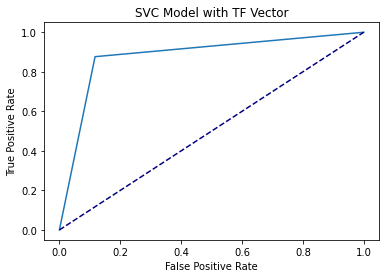

In [44]:
fpr, tpr, _ = roc_curve(test.sentiment, svcModel.predict(tfTest))
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)
plt.plot(fpr, tpr)
plt.title("SVC Model with TF Vector")
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [45]:
stopWords = ['in', 'of', 'at', 'a', 'the']
countVect = CountVectorizer(analyzer = "word", binary=True, ngram_range=(1, 2), stop_words=stopWords)
bwVectorizer = countVect.fit(train.review)
bwTotalTrain = bwVectorizer.transform(train.review)
bwTotalTest = bwVectorizer.transform(test.review)
totalTrainTarget = train.sentiment
totalTestTarget = test.sentiment

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(bwTotalTrain, totalTrainTarget, train_size = 0.75)

for i in [0.01, 0.25, 0.5, 1]:
    svcModel = LinearSVC(C=i)
    svcModel.fit(X_train, Y_train)
    print ("Accuracy for C=",i,"is",accuracy_score(Y_test,svcModel.predict(X_test)))

Accuracy for C= 0.01 is 0.89056
Accuracy for C= 0.25 is 0.88896
Accuracy for C= 0.5 is 0.88832
Accuracy for C= 1 is 0.88848


C:\Users\srava\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [47]:
svcModel = LinearSVC(C=0.01)
svcModel.fit(bwTotalTrain, totalTrainTarget)
print ("Final Accuracy:",accuracy_score(totalTestTarget, svcModel.predict(bwTotalTest))*100)

Final Accuracy: 88.716


In [48]:
#Classification report for count vectorized features
lsvc_cv_report=classification_report(totalTestTarget,svcModel.predict(bwTotalTest),target_names=['Positive','Negative'])
print("Classification Report:\n")
print(lsvc_cv_report)

#confusion matrix for count vectorized features
lsvc_cv_cm=confusion_matrix(totalTestTarget,svcModel.predict(bwTotalTest),labels=[1,0])
print("Confusion Matrix:\n")
print(lsvc_cv_cm)

Classification Report:

              precision    recall  f1-score   support

    Positive       0.89      0.88      0.89     12500
    Negative       0.88      0.89      0.89     12500

    accuracy                           0.89     25000
   macro avg       0.89      0.89      0.89     25000
weighted avg       0.89      0.89      0.89     25000

Confusion Matrix:

[[11167  1333]
 [ 1488 11012]]


AUC: 0.88716


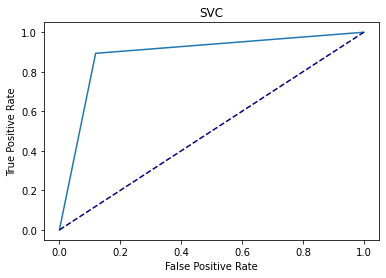

In [49]:
fpr, tpr, _ = roc_curve(totalTestTarget, svcModel.predict(bwTotalTest))
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)
plt.plot(fpr, tpr)
plt.title("SVC")
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()